In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv("./data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
print("Columns details")
pd.DataFrame(df.dtypes).rename(columns={0:'dtype'})

Columns details


,dtype
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [120]:
# identify the null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

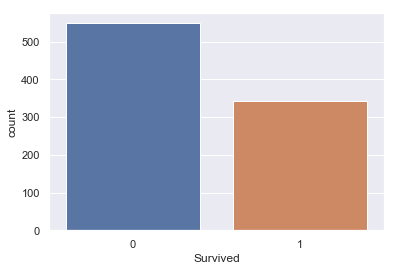

In [54]:
sns.countplot(x = 'Survived',data =df)

In [55]:
df.groupby('Survived').size().reset_index(name='counts')

,Survived,counts
0,0,549
1,1,342


In [56]:
# Feature analysis 
# Categorical feature - Sex

df.groupby(['Sex', 'Survived'])['Survived'].count().reset_index(name = 'count')

,Sex,Survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


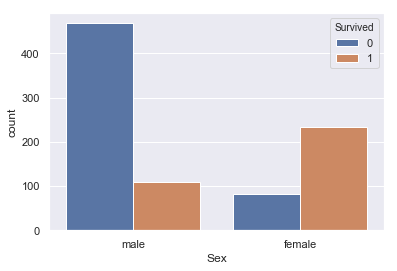

In [57]:
sns.countplot(x = 'Sex', hue='Survived', data = df)

In [58]:
# Ordinal feature - Pclass

pd.crosstab(df.Pclass, df.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


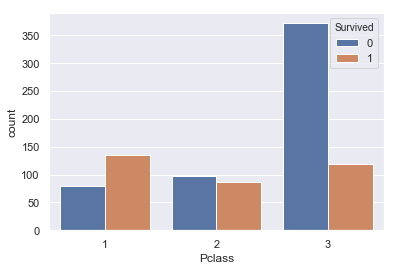

In [59]:
sns.countplot(x= 'Pclass', hue='Survived', data = df)

In [60]:
# Survival rate with Sex and Pclass
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins= True).style.background_gradient(cmap='summer_r')

In [61]:
# Continous feature - Age
print('Olderes Passenger was of:', df.Age.max(), 'Years')
print('Youngest Passenger was of:', df.Age.min(), 'Years')
print("Average Age of the Passengers in ship:" + "{:.2f}".format(df.Age.mean()), 'Years')

Olderes Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age of the Passengers in ship:29.70 Years


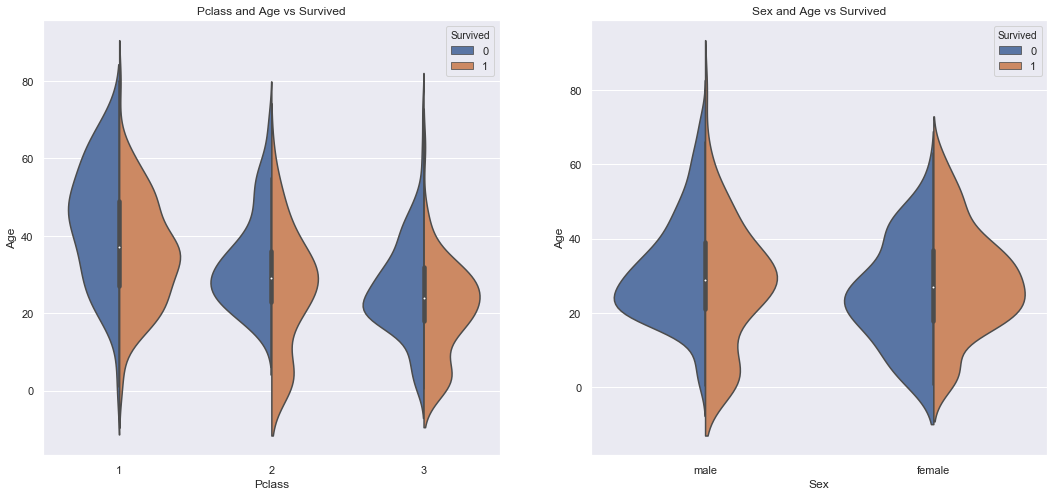

In [62]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", 
               hue="Survived", 
               data = df,
               split=True,
               ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot("Sex", "Age",
              hue="Survived",
              data = df,
              split=True,
              ax=ax[1])

ax[1].set_title('Sex and Age vs Survived')
plt.show()

In [121]:
# Age feature has 177 null values  
# Can assign mean age to people with Mr and Mrs in the name

df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(df.Initial, df.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [122]:
# There are misspelled initials

df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                      inplace=True)

df.groupby('Initial')['Age'].mean().reset_index(name ='Mean')

,Initial,Mean
0,Master,4.574167
1,Miss,21.860000
2,Mr,32.739609
3,Mrs,35.981818
4,Other,45.888889


In [123]:
# Assigning NaN values with mean values of age
df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age']= 46

df.Age.isnull().any()

False

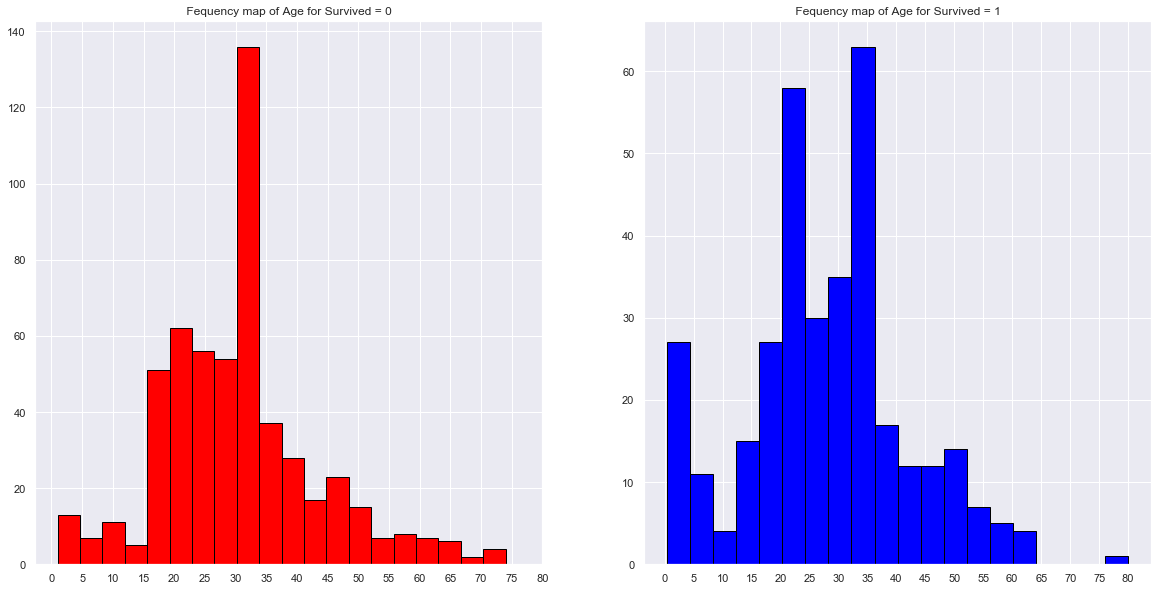

In [124]:
f, ax = plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.hist(ax=ax[0],
                              bins=20,
                              edgecolor='black',
                              color='red')
ax[0].set_title(' Fequency map of Age for Survived = 0 ')
x=list(range(0,85,5))
ax[0].set_xticks(x)

df[df['Survived']==1].Age.hist(ax=ax[1],
                              bins=20,
                              edgecolor='black',
                              color='blue')
ax[1].set_title(' Fequency map of Age for Survived = 1 ')
ax[1].set_xticks(x)

plt.show()

In [125]:
# Categorial value - Embarled

pd.crosstab([df.Embarked, df.Pclass], 
            [df.Sex, df.Survived], 
            margins=True).style.background_gradient(cmap='summer_r')

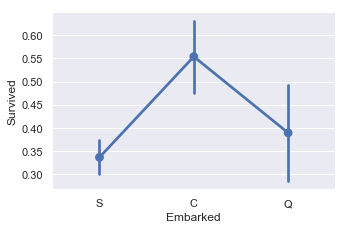

In [126]:
sns.factorplot(data= df, 
               x= 'Embarked',
               y= 'Survived')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

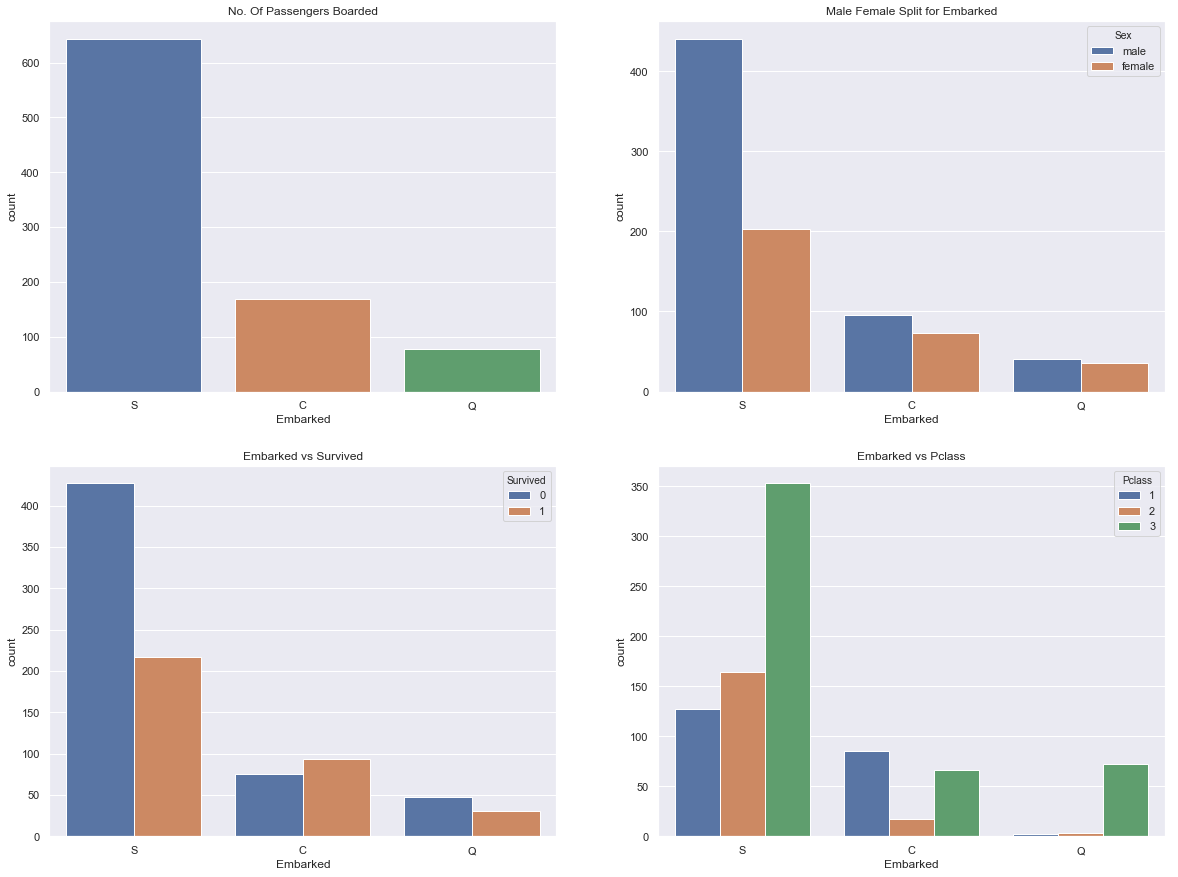

In [127]:
# Relation ship between Embarked vs Sex, Survived, Pclass
f,ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Male Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.show()


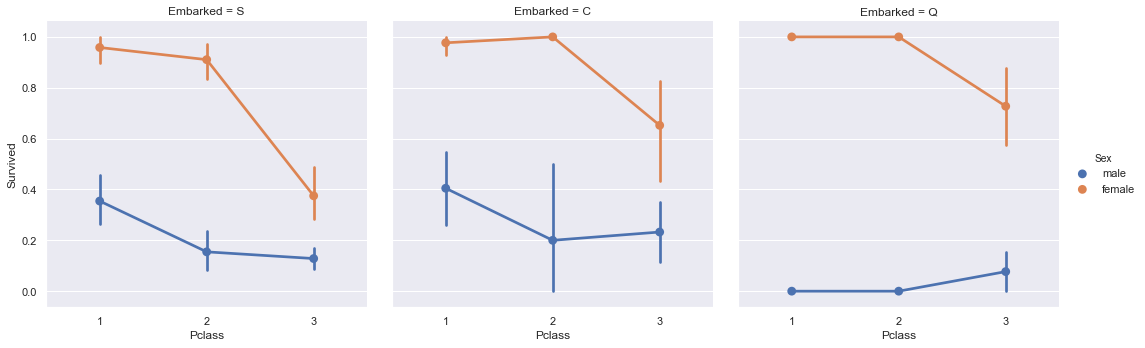

In [128]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df)
plt.show()

In [129]:
# Filling data for Embarked

df['Embarked'].fillna('S', inplace=True)
df.Embarked.isnull().any()

False

In [130]:
# Discrete feature SibSip
pd.crosstab(df.SibSp, df.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


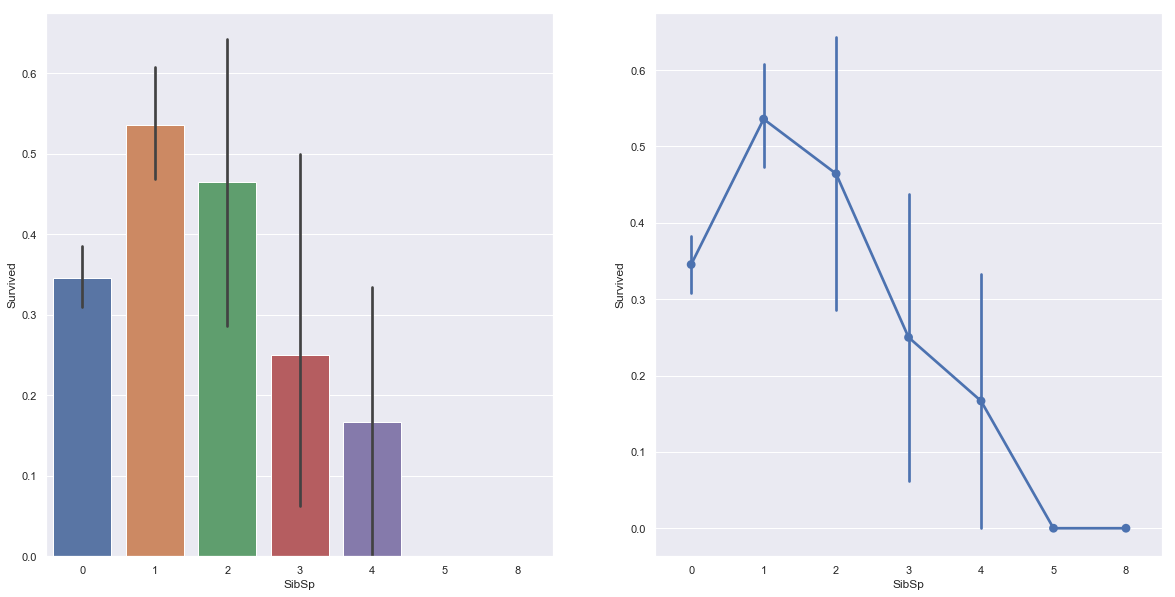

In [131]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('SibSp', 'Survived', data = df, ax=ax[0])

sns.factorplot('SibSp', 'Survived', data=df, ax=ax[1])
plt.close(2)
plt.show()

In [132]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [133]:
# Parch discrete variable 
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


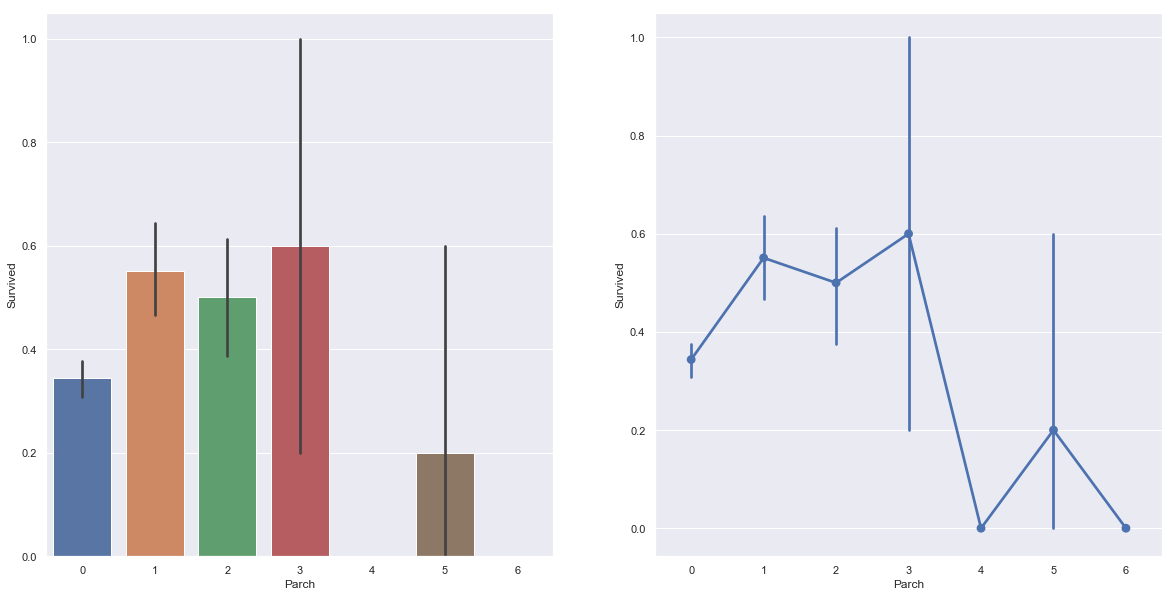

In [134]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.barplot('Parch', 'Survived', data = df, ax=ax[0])

sns.factorplot('Parch', 'Survived', data = df, ax=ax[1])
plt.close(2)
plt.show()

In [135]:
# Continous feature - Fare

print('Highest fare was: ', df.Fare.max())
print('Lowest fare was: ', df.Fare.min())
print('Average fare was:', df.Fare.mean())

Highest fare was:  512.3292
Lowest fare was:  0.0
Average fare was: 32.2042079685746


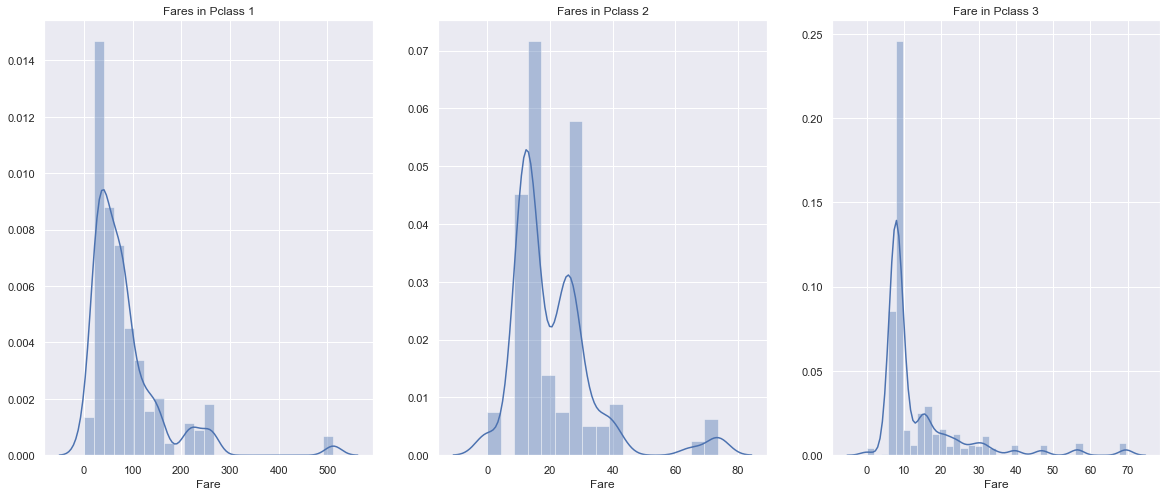

In [136]:
f,ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(df[df['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(df[df['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(df[df['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

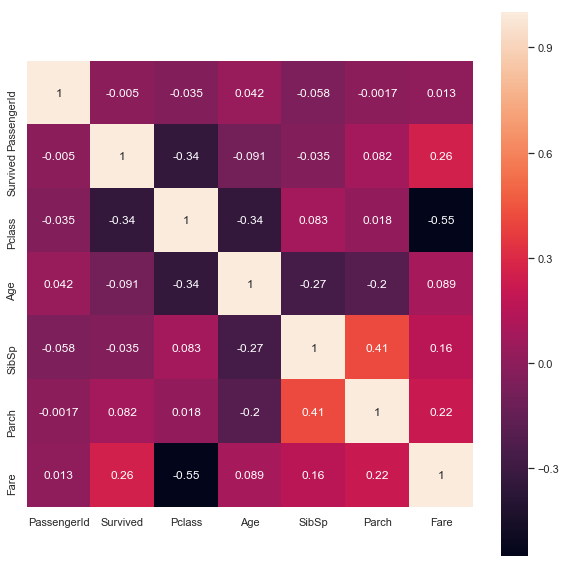

In [137]:
# Correlation between the features
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
sns.heatmap(df.corr(), square= True, cbar= True, annot= True)
plt.show()

In [138]:
# Feature cleaning 

df['Age_band']=0
df.loc[df.Age <= 16, 'Age_band'] = 0
df.loc[(df.Age > 16) & (df.Age <= 32), 'Age_band'] = 1
df.loc[(df.Age > 32) & (df.Age <= 48), 'Age_band'] = 2
df.loc[(df.Age > 48) & (df.Age <= 64), 'Age_band'] = 3
df.loc[df.Age > 64, 'Age_band'] = 4

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [139]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


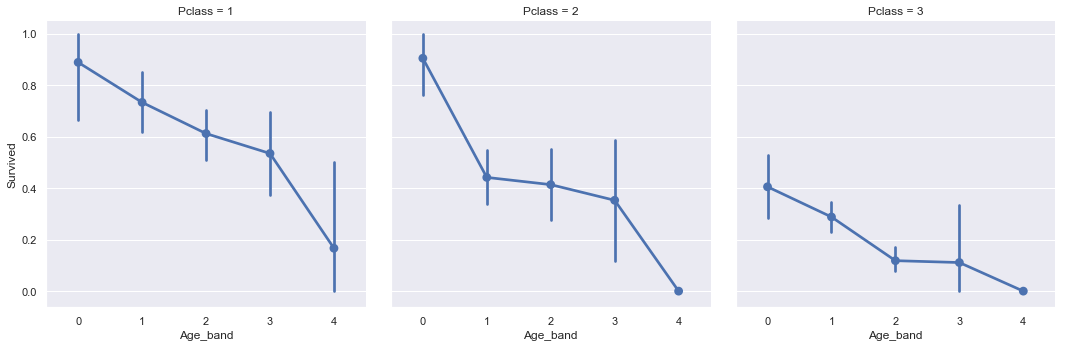

In [140]:
sns.factorplot('Age_band', 'Survived', data=df, col='Pclass')
plt.show()

In [141]:
df['Family_Size'] = 0
df['Family_Size'] = df.Parch + df.SibSp

df['Alone'] = 0
df.loc[df['Family_Size'] ==0, 'Alone'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


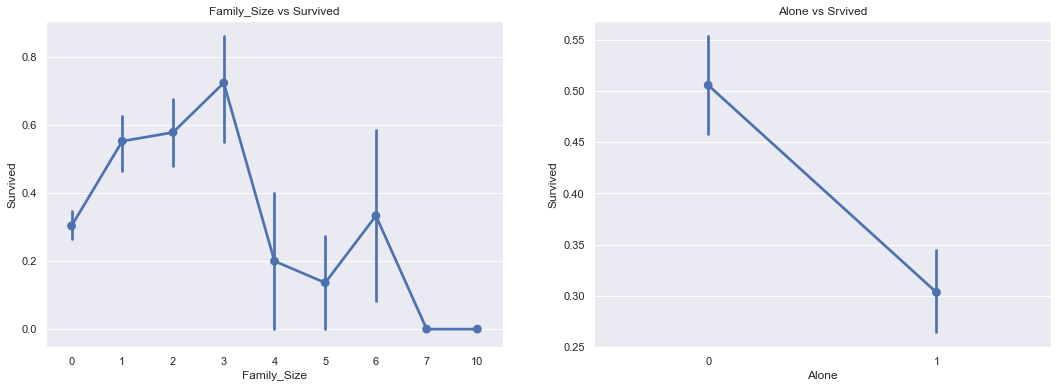

In [142]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data = df, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data = df, ax=ax[1])
ax[1].set_title('Alone vs Srvived')
plt.close(2)
plt.close(3)
plt.show()

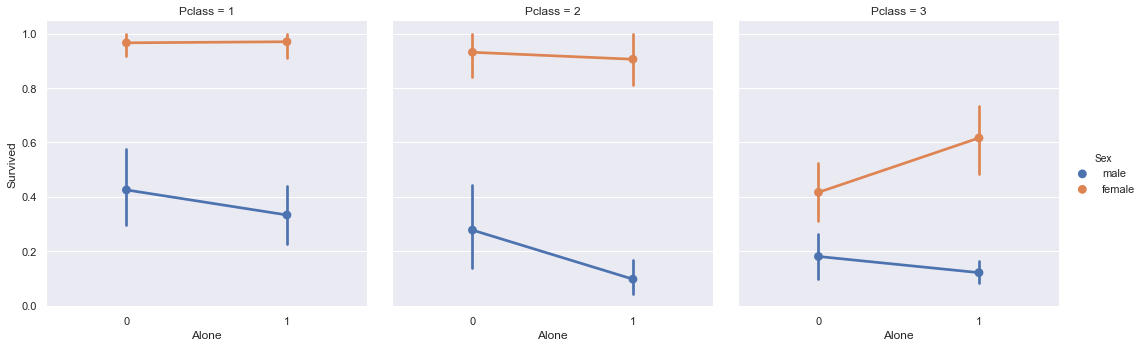

In [143]:
sns.factorplot('Alone', 'Survived', data = df, hue='Sex', col='Pclass')
plt.show()

In [144]:
# convert the fare into a ordinal variable 

df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


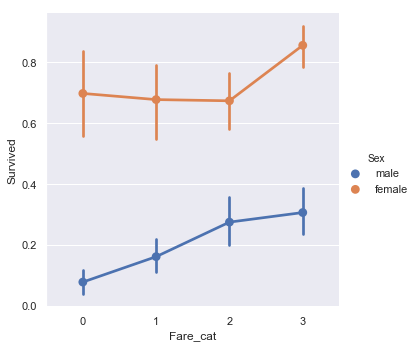

In [145]:
df['Fare_cat']=0
df.loc[df.Fare <= 7.91, 'Fare_cat']=0
df.loc[(df.Fare > 7.91) & (df.Fare <= 14.454), 'Fare_cat']=1
df.loc[(df.Fare > 14.454) & (df.Fare <= 31.0), 'Fare_cat']=2
df.loc[(df.Fare > 31.0) & (df.Fare <= 513), 'Fare_cat']=3

sns.factorplot('Fare_cat', 'Survived', data = df, hue='Sex')
plt.show()

In [146]:
# Converting strig values into numerics

df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
df['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

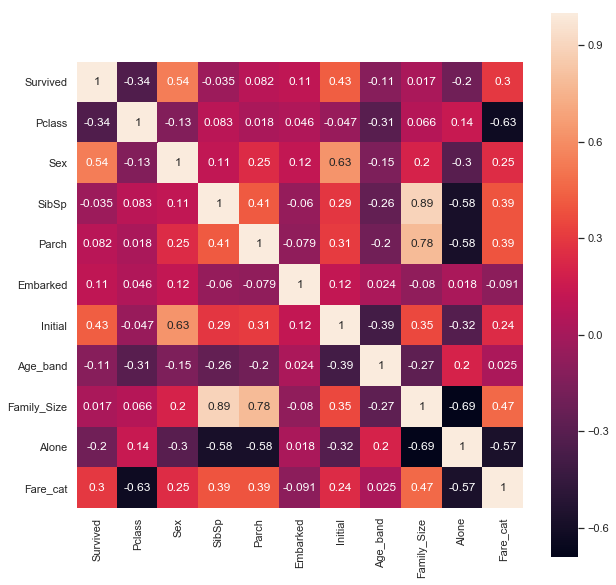

In [154]:
# Droping the coloumn
# df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace=True)

plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
sns.heatmap(df.corr(), square= True, cbar= True, annot= True)
plt.show()

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [175]:
# data preparation

train, test = train_test_split(df, test_size=0.3, 
                              random_state=0, 
                              stratify=df['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = df[df.columns[1:]]
Y = df[df.columns[:1]]

In [186]:
# Logistic regression 

model = LogisticRegression()
model.fit(train_X, train_Y)
pred_logit=model.predict(test_X)

print(f"Logistic regression accuracy: {metrics.accuracy_score(pred_logit, test_Y):.3f}")


Logistic regression accuracy: 0.817


In [188]:
# Decision Tree

model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
pred_DTC = model.predict(test_X)
print(f"Decision tree classifier accuracy: {metrics.accuracy_score(pred_DTC, test_Y):.3f}")

Decision tree classifier accuracy: 0.806


In [193]:
# K-Nearest Neighbours default values k=5

model = KNeighborsClassifier()
model.fit(train_X, train_Y)
pred_KNN= model.predict(test_X)
print(f"KNN accuracy:{metrics.accuracy_score(pred_KNN, test_Y):.3f}")

KNN accuracy:0.832


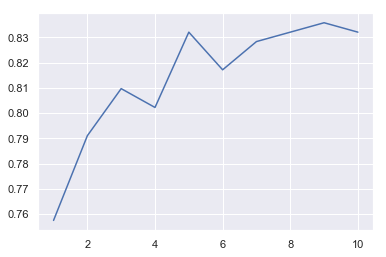

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [203]:
# For different values of k

accuracy_list= pd.Series()

for i in list(range(1,11)):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    pred=model.predict(test_X)
    accuracy_list=accuracy_list.append(pd.Series(metrics.accuracy_score(pred, test_Y)))
plt.plot(list(range(1,11)),accuracy_list)
plt.show()
print('Accuracies for different values of n are:',accuracy_list.values,'with the max value as ',accuracy_list.values.max())

In [208]:
# Random forest 

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred_RF= model.predict(test_X)
print(f"Random forest accuracy:{metrics.accuracy_score(pred_RF, test_Y):.3f}")

Random forest accuracy:0.821


In [212]:
# cross validation to improve the model variance

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


kfold = KFold(n_splits=10, random_state=22)

means = []
accuracy = []
std = []

classifiers=['Logistic Regression', 
             'KNN', 
             'Decision Tree', 
             'Random Forest']

models=[LogisticRegression(),
       KNeighborsClassifier(n_neighbors=9),
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, 
                                cv=kfold, 
                                scoring="accuracy")
    means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_result = pd.DataFrame({'CV Mean':means, 'STD':std}, index=classifiers)

models_result

,CV Mean,STD
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.810362,0.028329
Random Forest,0.811473,0.031120


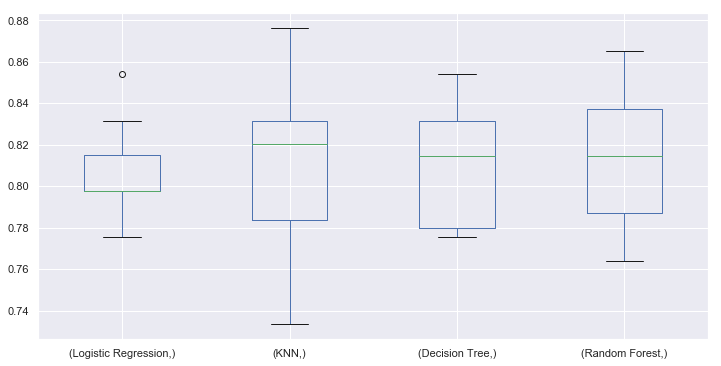

In [216]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

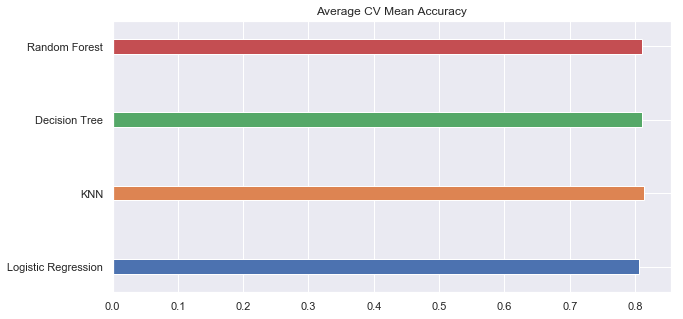

In [224]:
models_result['CV Mean'].plot.barh(width=0.2)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

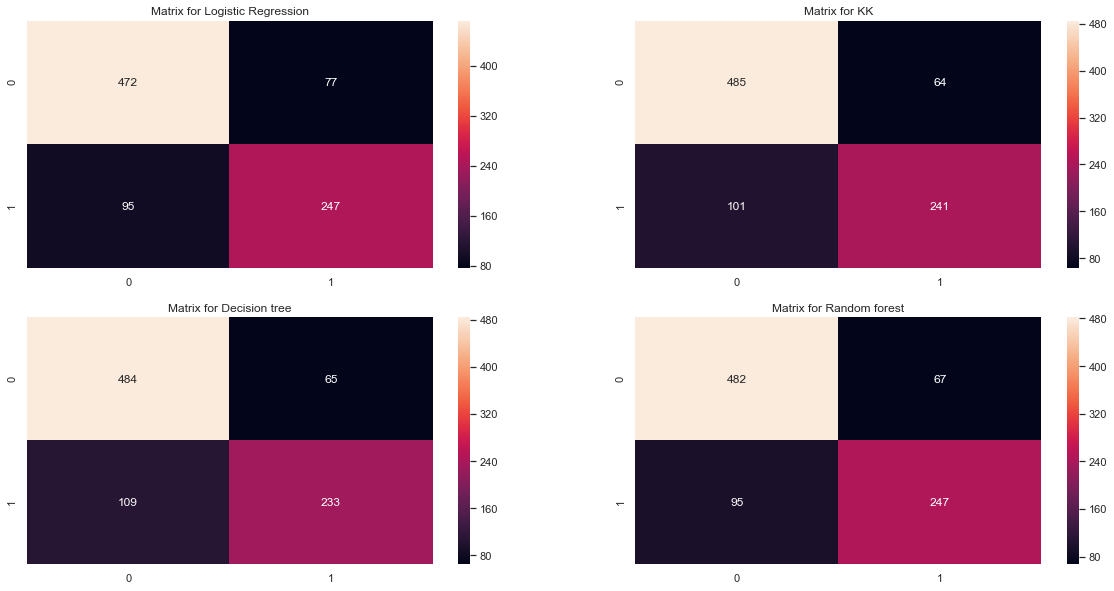

In [234]:
f,ax=plt.subplots(2,2,figsize=(20,10))

y_pred = cross_val_predict(LogisticRegression(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt ='2.0f')
ax[0,0].set_title("Matrix for Logistic Regression")


y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt ='2.0f')
ax[0,1].set_title("Matrix for KK")

y_pred = cross_val_predict(DecisionTreeClassifier(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt ='2.0f')
ax[1,0].set_title("Matrix for Decision tree")


y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt ='2.0f')
ax[1,1].set_title("Matrix for Random forest")

plt.show()




In [236]:
# Hyper paramter tuning for random forest

from sklearn.model_selection import GridSearchCV

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.6s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


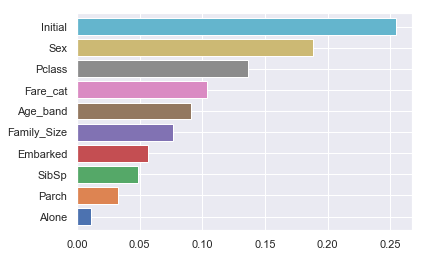

In [243]:
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)